<a href="https://colab.research.google.com/github/vijivenkadesh/AI_ML/blob/main/insurance_forecast_by_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
insurance_data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print(insurance_data['region'].value_counts())
insurance_data['region'] = insurance_data['region'].astype('category')
print(insurance_data['region'].cat.categories)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
Index(['northeast', 'northwest', 'southeast', 'southwest'], dtype='object')


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
cf = ColumnTransformer(transformers=[('encoding', OneHotEncoder(), ['sex', 'smoker', 'region'] )], remainder='passthrough')
df_new = pd.DataFrame(cf.fit_transform(insurance_data))

In [ ]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520


In [ ]:
insurance_oht = pd.get_dummies(insurance_data)
insurance_oht.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance_oht.drop('charges', axis=1)
y = insurance_oht['charges']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [ ]:
tf.random.set_seed(42)

In [ ]:
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)
])

In [ ]:
insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8614.1514 - mae: 8614.1514
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7866.6328 - mae: 7866.6328
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7582.9268 - mae: 7582.9268
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7635.8384 - mae: 7635.8384
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7701.2759 - mae: 7701.2759
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7614.4282 - mae: 7614.4282
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7645.3979 - mae: 7645.3979
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7765.5405 - mae: 7765.5405
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7436.2515 - mae: 7436.2515
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7770.2656 - mae: 7770.2656

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 1s 5ms/step - loss: 7293.8003 - mae: 7293.8003


[7293.80029296875, 7293.80029296875]

# Tuning the Model

#Optimizer Adam and Leraning rate added

In [ ]:
tf.random.set_seed(42)

In [ ]:
insurance_model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

In [ ]:
insurance_model2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

In [ ]:
history = insurance_model2.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 6ms/step - loss: 12939.3887 - mae: 12939.3887
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 10494.3867 - mae: 10494.3867
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 7660.5278 - mae: 7660.5278
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 7420.2563 - mae: 7420.2563
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 7343.3584 - mae: 7343.3584
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 7278.9292 - mae: 7278.9292
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 7192.8286 - mae: 7192.8286
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7113.5698 - mae: 7113.5698
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7027.0850 - mae: 7027.0850
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 6936.6162 - mae: 6936.

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7293.8003 - mae: 7293.8003


[7293.80029296875, 7293.80029296875]

In [ ]:
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3163.3525 - mae: 3163.3525


[3163.3525390625, 3163.3525390625]

Text(0, 0.5, 'loss')

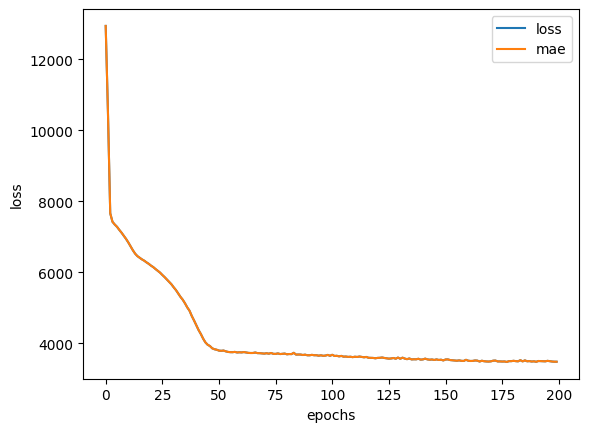

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

# Scaling the data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
cf_scale = ColumnTransformer(transformers=[('scaler', MinMaxScaler(), ['age', 'bmi', 'children'])], remainder='passthrough')
cf_scale.fit_transform(insurance_oht)

array([[0.02173913, 0.3212268 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.47914985, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.2173913 , 0.45843422, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.35270379, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
insurance_oht

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1
